In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


(array([ 4821.,  2151.,  1917.,  1788.,  1493.,  1166.,   931.,   729.,
          542.,   445.,   371.,   292.,   203.,   166.,   119.,    69.,
           80.,    59.,    25.,    12.]),
 array([   1. ,   49.8,   98.6,  147.4,  196.2,  245. ,  293.8,  342.6,
         391.4,  440.2,  489. ,  537.8,  586.6,  635.4,  684.2,  733. ,
         781.8,  830.6,  879.4,  928.2,  977. ]),
 <a list of 20 Patch objects>)

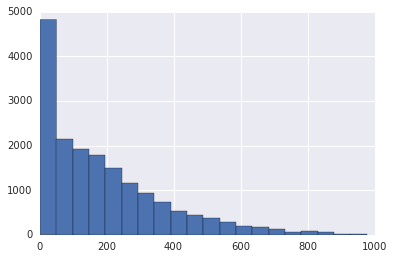

In [2]:
plt.hist(bike_rentals['cnt'], 20) 

In [3]:
corrmat = bike_rentals.corr()
cnt_corr = bike_rentals.corr()['cnt']

In [4]:
cnt_corr

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

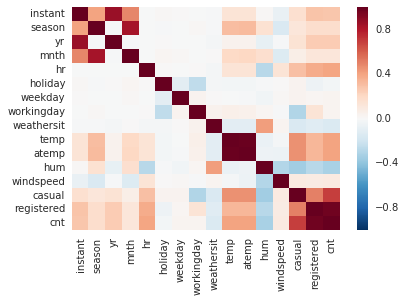

In [5]:
sns.heatmap(corrmat)

In [6]:
def assign_label(hour):
    if hour >= 0 and hour < 6:
        return 4
    elif hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour < 24:
        return 3
    else:
        return ('NaN')

In [7]:
hourly_rentals = bike_rentals['hr']
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals.head(30)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


Use MSE as error metric, performs well on continuous data, matches our data best

In [8]:
cutoff = bike_rentals.shape[0] * 0.8
train = bike_rentals.sample(frac = 0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [9]:
bike_rentals.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_label'],
      dtype='object')

In [10]:
columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'time_label']

# other candidates to remove: yr

In [11]:
bike_rentals['yr'].value_counts()

1    8734
0    8645
Name: yr, dtype: int64

Actually also remove year, values split about halfway

In [12]:
columns = ['season', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'time_label']

Since weekday and working day dont seem to have any correlation with cnt, remove these too

In [13]:
columns = ['season', 'mnth', 'hr', 'holiday', 'weathersit', 'temp',
           'atemp', 'hum', 'windspeed', 'time_label']

In [14]:
lr = LinearRegression()
lr.fit(train[columns], train['cnt'])
predictions = lr.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

19945.009176363888

My error higher than the demonstration, who excluded less columns. Try adding a few back in

In [15]:
columns = list(train.columns)
columns.remove("cnt")
columns.remove("casual")
columns.remove("registered")
columns.remove("dteday")

In [16]:
lr.fit(train[columns], train["cnt"])
predictions = lr.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

17982.800594387256

error still slightly higher than theirs, but still lower than without other columns. The lesson here is dont automatically remove predictors which dont seem to be correlated to target in any way. The other lesson is that the error is still high, probably caused by days with lots of hiring

In [17]:
tree = DecisionTreeRegressor(min_samples_leaf = 5)

In [18]:
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2677.3634389827857

My error is still slightly higher than test but much lower. Experiment with some extra min_samples_leaf values

In [20]:
tree = DecisionTreeRegressor(min_samples_leaf = 2)
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

3047.148438498913

In [21]:
tree = DecisionTreeRegressor(min_samples_leaf = 10)
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2802.1899794348719

In [22]:
tree = DecisionTreeRegressor(min_samples_leaf = 50)
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

4148.9018307863298

In [23]:
tree = DecisionTreeRegressor(min_samples_leaf = 20)
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2929.0454115094576

In [24]:
tree = DecisionTreeRegressor(min_samples_leaf = 15)
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2866.907620182239

In [25]:
tree = DecisionTreeRegressor(min_samples_leaf = 13)
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2890.1057094235039

In [26]:
tree = DecisionTreeRegressor(min_samples_leaf = 7)
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2781.1712565154448

In [27]:
tree = DecisionTreeRegressor(min_samples_leaf = 9)
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2790.6110328433188

In [28]:
tree = DecisionTreeRegressor(min_samples_leaf = 11)
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2853.3108187352118

In [29]:
tree = DecisionTreeRegressor(min_samples_leaf = 10)
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2802.307215142213

7 looks optimal but always remember random state matters. Min samples leaf is the minimum allowable samples to be a leaf node

In [31]:
#Random Forest, tweak min samples and n_estimators

In [32]:
forest = RandomForestRegressor(min_samples_leaf = 7, n_estimators = 5)
forest.fit(train[columns], train['cnt'])
predictions = forest.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2175.5087486557563

In [33]:
forest = RandomForestRegressor(min_samples_leaf = 7, n_estimators = 10)
forest.fit(train[columns], train['cnt'])
predictions = forest.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2077.1965792605079

In [34]:
forest = RandomForestRegressor(min_samples_leaf = 7, n_estimators = 30)
forest.fit(train[columns], train['cnt'])
predictions = forest.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2037.7417989609987

Worth noting here that error improves all the time but also runs noticeably slower, even on the relatively small dataset.

In [35]:
forest = RandomForestRegressor(min_samples_leaf = 7, n_estimators = 2)
forest.fit(train[columns], train['cnt'])
predictions = forest.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2737.5901375777407

In [37]:
forest = RandomForestRegressor(min_samples_leaf = 7, n_estimators = 5)
forest.fit(train[columns], train['cnt'])
predictions = forest.predict(test[columns])
mse = mean_squared_error(predictions, test['cnt'])
mse

2108.9264313440835

Random Forest accuracy better and overfitting avoided